In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2                                    

# path of Train images

In [2]:
a = 'tranning'

In [3]:
path = Path(a)
path.ls()

(#8) [Path('tranning/Art'),Path('tranning/generic'),Path('tranning/Meme'),Path('tranning/Pets'),Path('tranning/Selfiee'),Path('tranning/Sexual'),Path('tranning/Silly_Image'),Path('tranning/Testbased')]

# Data load for training

In [4]:
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)

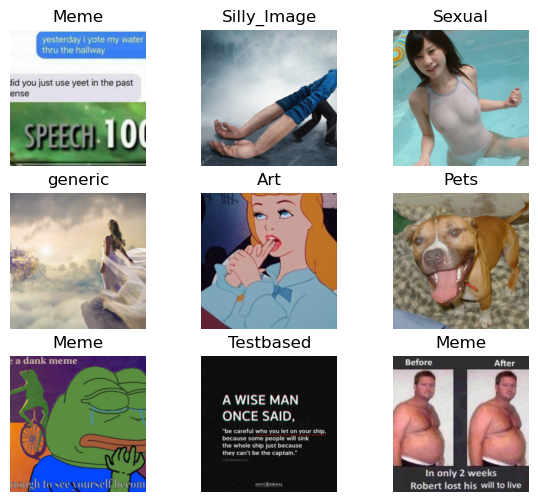

In [5]:
data.show_batch(figsize=(7,6))

In [6]:
data.c #number of classes

8

In [7]:
len(data.train_ds) #length of train data

178

In [8]:
len(data.valid_ds) # lentgh of test data

44

In [9]:
print(data.vocab) #classes of data

['Art', 'Meme', 'Pets', 'Selfiee', 'Sexual', 'Silly_Image', 'Testbased', 'generic']


# cration of model

In [10]:
learn = cnn_learner(data, models.resnet18, model_dir='.', path = Path("."))

D:\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ThinkPad T470/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 9.89MB/s]


# finding LR

SuggestedLRs(valley=0.001737800776027143)

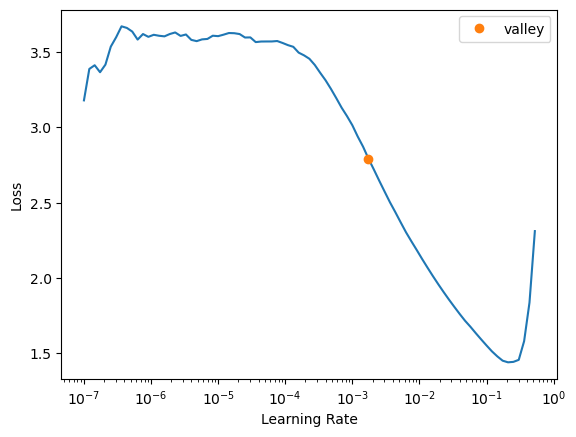

In [11]:
learn.lr_find()
# learn.recorder.plot_model(suggestions=True)

In [12]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(50,slice(lr1,lr2))

# Hyper Parameter Tuning

In [13]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

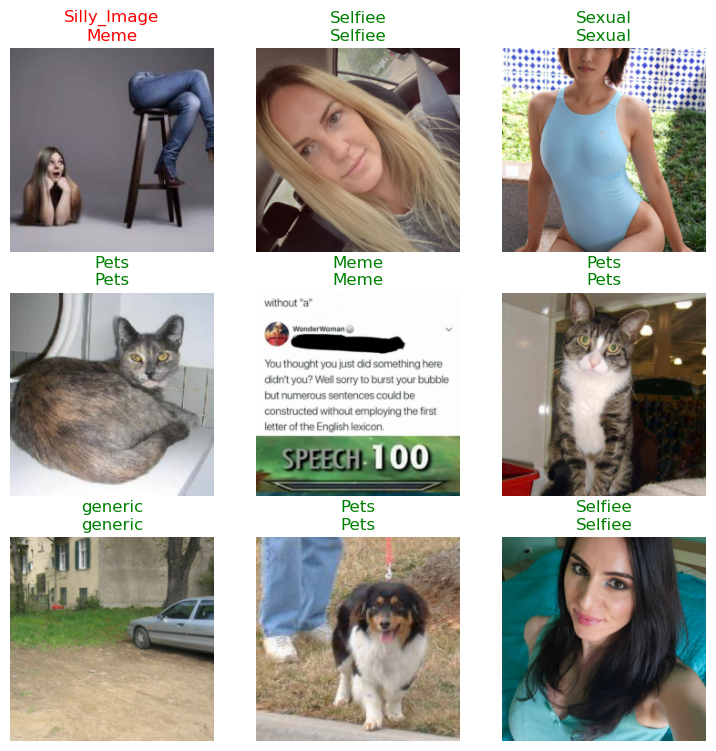

In [14]:
learn.show_results()

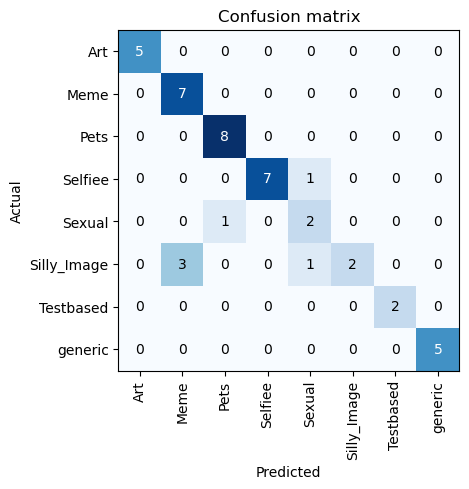

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Interpretation of result

In [16]:
# Counting the values of losses
interp.top_losses(largest=True)

(TensorBase([2.3571e+01, 1.4225e+01, 1.0710e+01, 3.0225e+00, 1.6587e+00,
             1.1017e+00, 3.2903e-01, 2.0729e-01, 6.4471e-04, 3.6567e-04,
             2.3484e-05, 1.1921e-07, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
             -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00]),
 TensorBase([18, 40, 25, 42,  3, 26, 35, 10, 29,  8, 32, 36, 11, 12, 13, 14, 15,
             16, 17, 19, 20, 21, 22, 23, 24,  1,  2, 27, 28,  4, 30, 31,  0, 33,
             34,  6,  7, 37, 38, 39,  9, 41,  5, 43]))

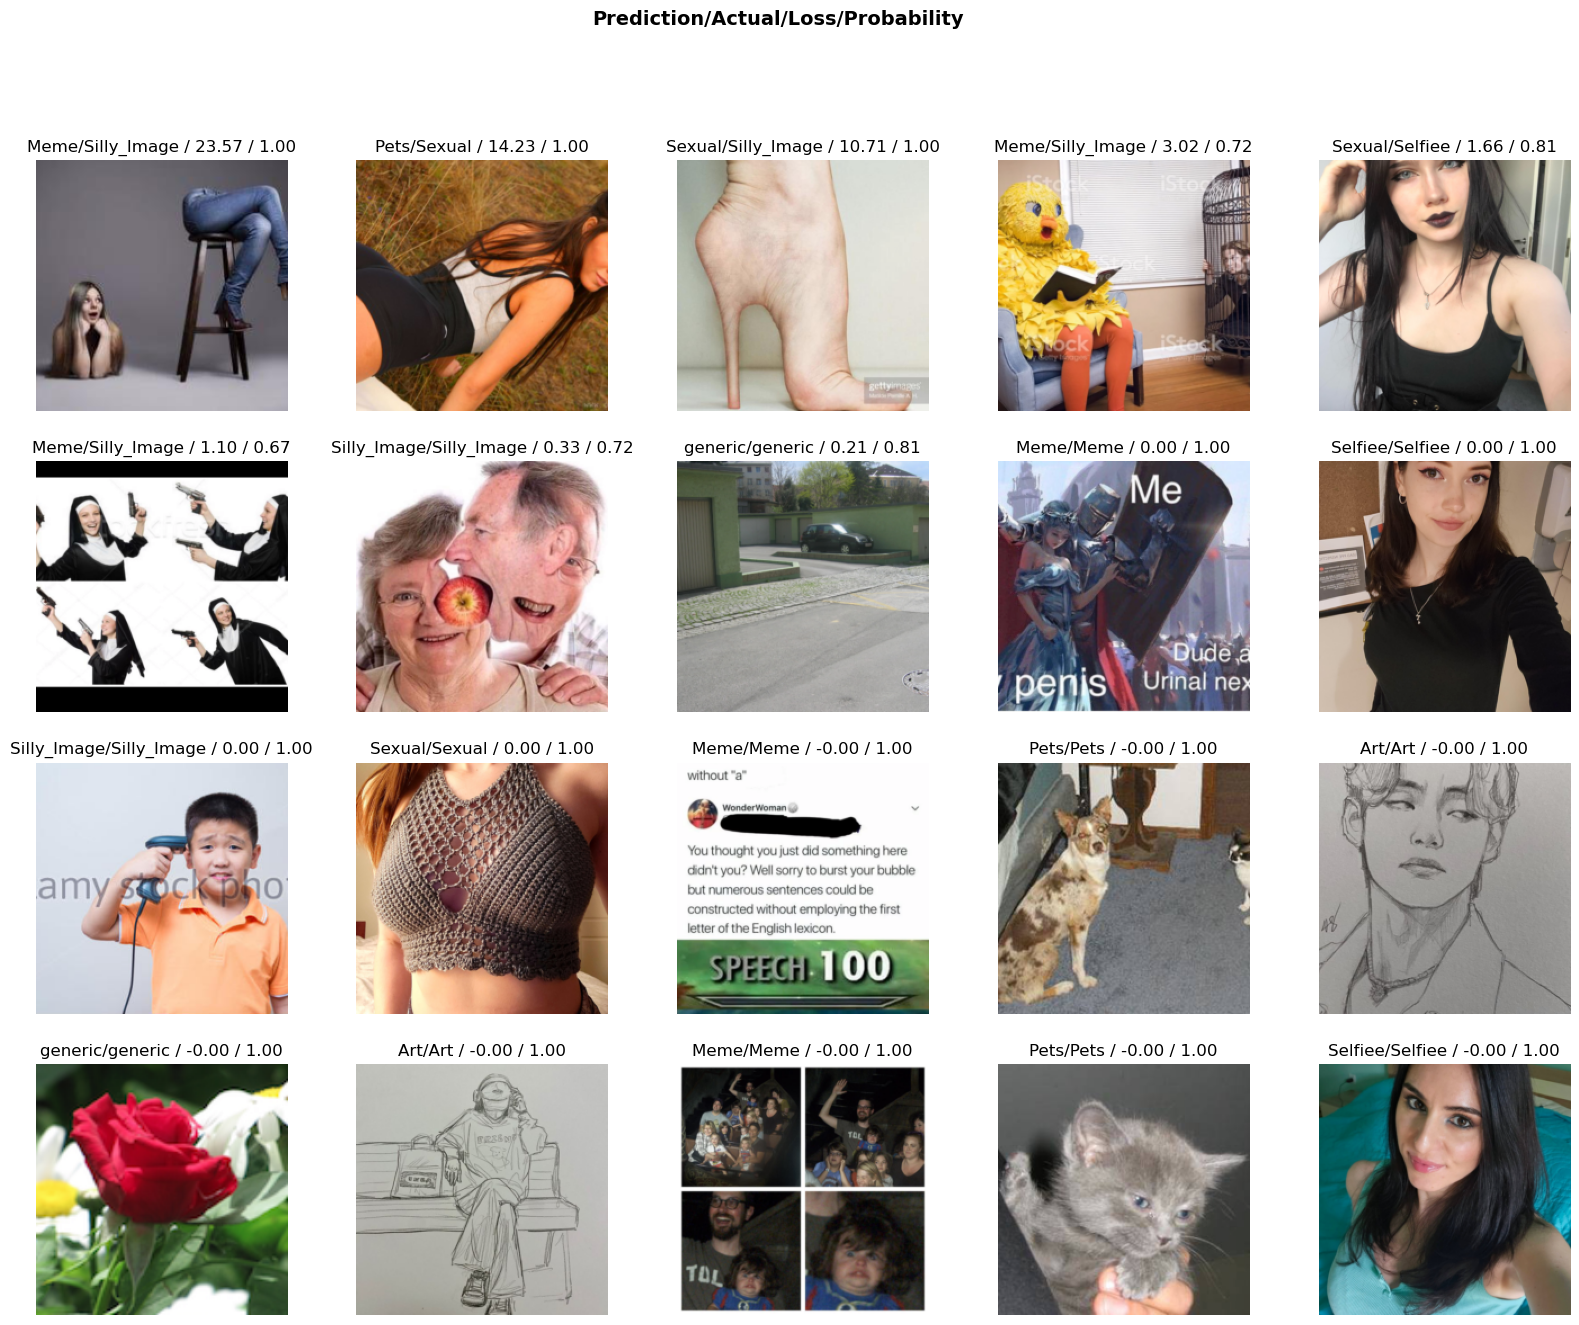

In [17]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

# Saving the model

In [19]:
learn.export(Path("export.pkl"))
learn.model_dir = "working"
learn.save("stage-1")

Path('working/stage-1.pth')

In [20]:
learn = load_learner('export.pkl')

Predicted label: Silly_Image, probability: 1.0000


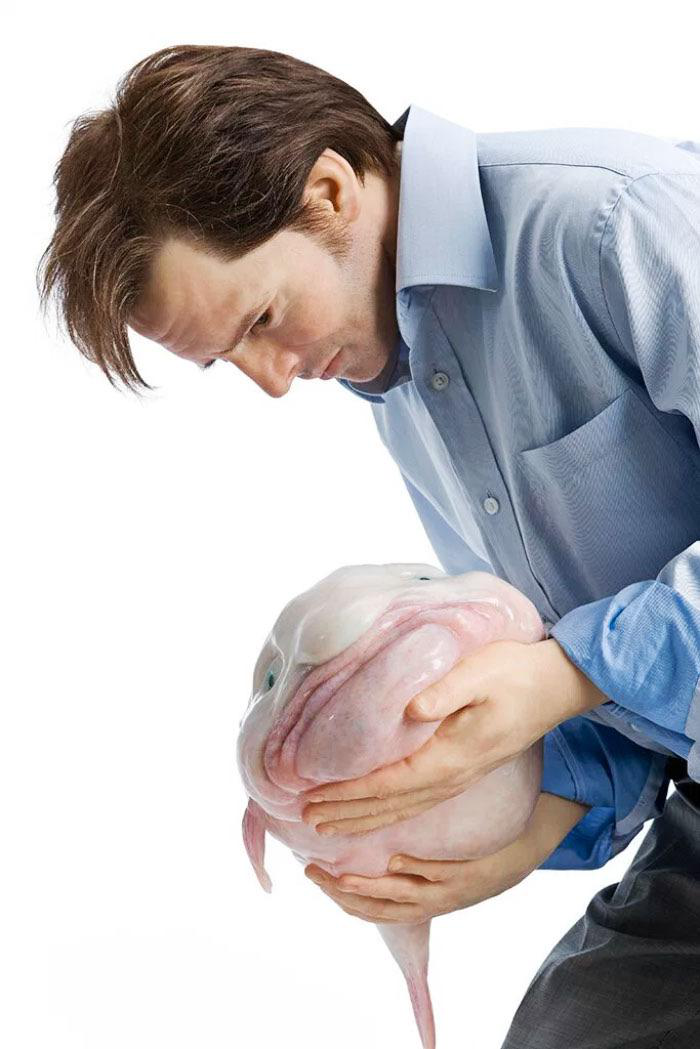

In [22]:
#just cheeking the thing works fine
from PIL import Image
img = Image.open(r'Tranning\Silly_Image\2hbt7ut4r2r31.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
im_t = cast(array(img_resized), TensorImage)
# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img